In [8]:
# https://k3no.medium.com/how-to-query-in-graphql-6ebb3f7085dc
# https://github.com/sushiswap/sushiswap-subgraph

In [7]:
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

sample_transport=RequestsHTTPTransport(
    url='https://api.thegraph.com/subgraphs/name/sushiswap/matic-exchange',
    verify=True,
    retries=3,
)

client = Client(
    transport=sample_transport
)



In [8]:
query = gql('''
query {
  factories(where: {liquidityUSD_gt:0}) {
    pairCount
  }
}
''')

response = client.execute(query)

print(response)

{'factories': [{'pairCount': '756'}]}


In [15]:
number_of_pairs = int(response['factories'][0]['pairCount'])
number_of_pairs

756

In [30]:
start = 0
end = 10


querystring = '''
              query {
              pairs(first: '''+str(end)+' skip: '+str(start)+''' where: {volumeUSD_gt:0}){
                      name
                  }
                }
                '''

In [31]:
client.execute(gql(querystring))

{'pairs': [{'name': 'YELD-WMATIC'},
  {'name': 'WMATIC-YELD'},
  {'name': 'WMATIC-MOON'},
  {'name': 'WETH-IRON'},
  {'name': 'WMATIC-DRC'},
  {'name': 'USDC-IGG'},
  {'name': 'WMATIC-HEX'},
  {'name': 'DAI-METH'},
  {'name': 'WMATIC-FXS'},
  {'name': 'WMATIC-POLYAPE'}]}

In [79]:
df = pd.DataFrame([])
response_dict = {}
response_list = []


for i in range(number_of_pairs):
    if i % 10 == 0:
        querystring = '''
              query {
              pairs(first: '''+str(i+10)+' skip: '+str(i)+''' where: {volumeUSD_gt:0}){
                      name
                  }
                }
                '''
        response = client.execute(gql(querystring))
        for row in response['pairs']:
            response_list.append(row['name'])    

response_list

['YELD-WMATIC',
 'WMATIC-YELD',
 'WMATIC-MOON',
 'WETH-IRON',
 'WMATIC-DRC',
 'USDC-IGG',
 'WMATIC-HEX',
 'DAI-METH',
 'WMATIC-FXS',
 'WMATIC-POLYAPE',
 'WMATIC-KNG',
 'WOO-WETH',
 'WMATIC-PolySave',
 'WMATIC-BIFI',
 'WMATIC-APT',
 'USDC-BUSD',
 'WETH-GAJ',
 'SNX-WETH',
 'WETH-IGG',
 'WMATIC-CRV',
 'WMATIC-CHUM',
 'KNG-USDC',
 'USDC-GAJ',
 'WETH-renBCH',
 'WMATIC-SGAJ',
 'SUSHI-DAI',
 'USDC-BIFI',
 'WMATIC-SBC',
 'WMATIC-GBTS',
 'pUSDC-USDT',
 'WMATIC-CHUM',
 'KNG-USDC',
 'USDC-GAJ',
 'WETH-renBCH',
 'WMATIC-SGAJ',
 'SUSHI-DAI',
 'USDC-BIFI',
 'WMATIC-SBC',
 'WMATIC-GBTS',
 'pUSDC-USDT',
 'WETH-SX',
 'USDC-BOOTY',
 'GRT-WETH',
 'WMATIC-OFT',
 'WMATIC-OM',
 'USDC-ACORN',
 'TNG-USDC',
 'UNI-USDT',
 'WMATIC-VOLY',
 'AURORA-USDC',
 'ARIA20-WETH',
 'WMATIC-WOOFY',
 'WETH-WFIL',
 'USDC-GHST',
 '🌾-WETH',
 'WBTC-renBTC',
 'PLF-USDT',
 'dTOP-WETH',
 'FRAX-USDT',
 'WMATIC-BORG',
 'WETH-SX',
 'USDC-BOOTY',
 'GRT-WETH',
 'WMATIC-OFT',
 'WMATIC-OM',
 'USDC-ACORN',
 'TNG-USDC',
 'UNI-USDT',
 'WMATIC

In [80]:
df = pd.DataFrame.from_dict(response_list).drop_duplicates()
df.value_counts()

$DG-WETH         1
WMATIC-HUI       1
WMATIC-KTN       1
WMATIC-KNG       1
WMATIC-JPYC      1
                ..
USDC-PolyDoge    1
USDC-PLF         1
USDC-PBNB        1
USDC-PAUTO       1
🌾-WETH           1
Length: 375, dtype: int64

In [84]:
df[['Token 0', 'Token 1']] = df[0].str.split('-', expand = True)
df

,0,Token 0,Token 1
0,YELD-WMATIC,YELD,WMATIC
1,WMATIC-YELD,WMATIC,YELD
2,WMATIC-MOON,WMATIC,MOON
3,WETH-IRON,WETH,IRON
4,WMATIC-DRC,WMATIC,DRC
...,...,...,...
2290,USDC-JPYC,USDC,JPYC
2291,ET-WETH,ET,WETH
2292,pDAI-USDT,pDAI,USDT
2293,USDC-AMIS,USDC,AMIS


In [274]:
interesting_tokens = ['YFI', 'WOOFY', 'WMATIC', 'AAVE', 'WETH', 'ETH', 'SUSHI', 'UNI', 'SNX', 'LINK', 'DAI', 'USDC', 'USDT', 'FRAX']
interesting_tokens = ['USDC', 'USDT', 'DAI', 'FRAX', 'IRON']

criteria = df['Token 0'].isin(interesting_tokens) & \
           df['Token 1'].isin(interesting_tokens)

df_filtered = df.loc[criteria,:]
df_filtered.columns = ['Pair', 'Token 0', 'Token 1']
df_filtered.head()

,Pair,Token 0,Token 1
58,FRAX-USDT,FRAX,USDT
146,DAI-USDT,DAI,USDT
263,USDC-USDT,USDC,USDT
642,USDT-IRON,USDT,IRON
644,USDC-IRON,USDC,IRON


In [275]:
# make a list of strings with double quotes

stringtest = "["

for i in df_filtered['Pair'].values.tolist():
    stringtest += '"'+ i + '",'
    
stringtest[:-1]+"]"

'["FRAX-USDT","DAI-USDT","USDC-USDT","USDT-IRON","USDC-IRON","FRAX-USDC","DAI-IRON","USDC-DAI"]'

In [276]:
querystring = '''
              query {
  pairs(where: {name_in: ''' + stringtest[:-1]+"]" + '''}){
    name
    dayData{
      date
      reserveUSD
      volumeUSD
      txCount
    }
  }
}
                '''
response = client.execute(gql(querystring))
response

{'pairs': [{'dayData': [{'date': 1623110400,
     'reserveUSD': '649.8294949941474512327343975173195',
     'txCount': '37',
     'volumeUSD': '46.09457484830514114805478326828452'},
    {'date': 1623196800,
     'reserveUSD': '0.02840318539860945399463465616537117',
     'txCount': '11',
     'volumeUSD': '10.81656885031652838578717590619579'}],
   'name': 'FRAX-USDT'},
  {'dayData': [{'date': 1614902400,
     'reserveUSD': '0',
     'txCount': '1',
     'volumeUSD': '0'},
    {'date': 1614988800, 'reserveUSD': '0', 'txCount': '6', 'volumeUSD': '0'},
    {'date': 1615075200, 'reserveUSD': '0', 'txCount': '38', 'volumeUSD': '0'},
    {'date': 1615161600, 'reserveUSD': '0', 'txCount': '62', 'volumeUSD': '0'},
    {'date': 1615248000, 'reserveUSD': '0', 'txCount': '52', 'volumeUSD': '0'},
    {'date': 1615334400, 'reserveUSD': '0', 'txCount': '25', 'volumeUSD': '0'},
    {'date': 1615420800, 'reserveUSD': '0', 'txCount': '50', 'volumeUSD': '0'},
    {'date': 1615507200, 'reserveUSD': '0'

In [277]:
df4 = pd.DataFrame([])

for pair_no in range(len(response['pairs'])):
    df3 = pd.DataFrame.from_dict(response['pairs'][pair_no])
    df3[['date', 'reserveUSD', 'txCount', 'volumeUSD']] = df3['dayData'].apply(pd.Series)
    df3 = df3.drop(columns = ['dayData'])
    df4 = df4.append(df3)
    
df4[['date','reserveUSD','volumeUSD']] = df4[['date','reserveUSD','volumeUSD']].astype(float)
df4['txCount'] = df4['txCount'].astype(int)
df4['date'] = pd.to_datetime(df4['date'], unit='s')
df4['fee'] = round(df4['volumeUSD'] * 0.003,6)
df4['1y APR for 100 invested'] = round((100/df4['reserveUSD']) * df4['fee'] * 365,3)
df4

,name,date,reserveUSD,txCount,volumeUSD,fee,1y APR for 100 invested
0,FRAX-USDT,2021-06-08,6.498295e+02,37,4.609457e+01,0.138284,7.767
1,FRAX-USDT,2021-06-09,2.840319e-02,11,1.081657e+01,0.032450,41700.428
0,DAI-USDT,2021-03-05,0.000000e+00,1,0.000000e+00,0.000000,NaN
1,DAI-USDT,2021-03-06,0.000000e+00,6,0.000000e+00,0.000000,NaN
2,DAI-USDT,2021-03-07,0.000000e+00,38,0.000000e+00,0.000000,NaN
...,...,...,...,...,...,...,...
94,USDC-DAI,2021-06-08,4.410043e+07,1870,1.872156e+06,5616.468654,4.649
95,USDC-DAI,2021-06-09,4.410152e+07,1720,1.843099e+06,5529.295552,4.576
96,USDC-DAI,2021-06-10,4.571544e+07,2348,5.241659e+06,15724.978238,12.555
97,USDC-DAI,2021-06-11,5.221368e+07,2189,3.744902e+06,11234.704793,7.854


In [278]:
latest_results = df4.drop_duplicates(subset = ['name'], keep = 'last')\
                    .sort_values(by = '1y APR for 100 invested',
                                 ascending = False)\
                    .reset_index(drop = True)
latest_results.style.format({'reserveUSD': "{:0<4,.2f}"})

,name,date,reserveUSD,txCount,volumeUSD,fee,1y APR for 100 invested
0,FRAX-USDT,2021-06-09 00:00:00,0.03,11,10.816569,0.032450,41700.428000
1,DAI-IRON,2021-06-12 00:00:00,0.23,11,2.005008,0.006015,964.726000
2,USDC-IRON,2021-06-12 00:00:00,"424,744,712.38",38456,50727996.852460,152183.990557,13.078000
3,FRAX-USDC,2021-06-12 00:00:00,"24,545,827.85",1815,1692381.371426,5077.144114,7.550000
4,USDC-DAI,2021-06-12 00:00:00,"42,985,505.36",1532,2357829.974206,7073.489923,6.006000
5,USDT-IRON,2021-06-12 00:00:00,171.26,29,7.705908,0.023118,4.927000
6,USDC-USDT,2021-06-12 00:00:00,"53,946,686.50",2199,2119836.994358,6359.510983,4.303000
7,DAI-USDT,2021-06-12 00:00:00,"6,012.04",66,139.530336,0.418591,2.541000


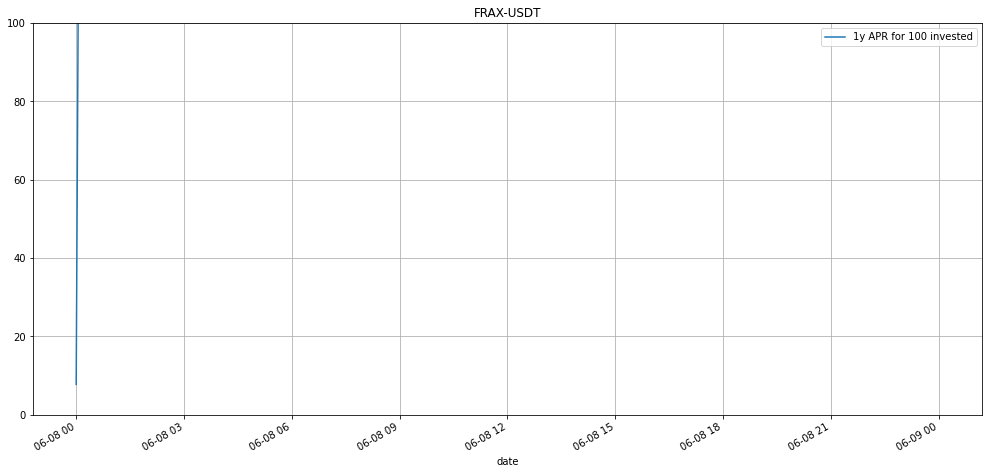

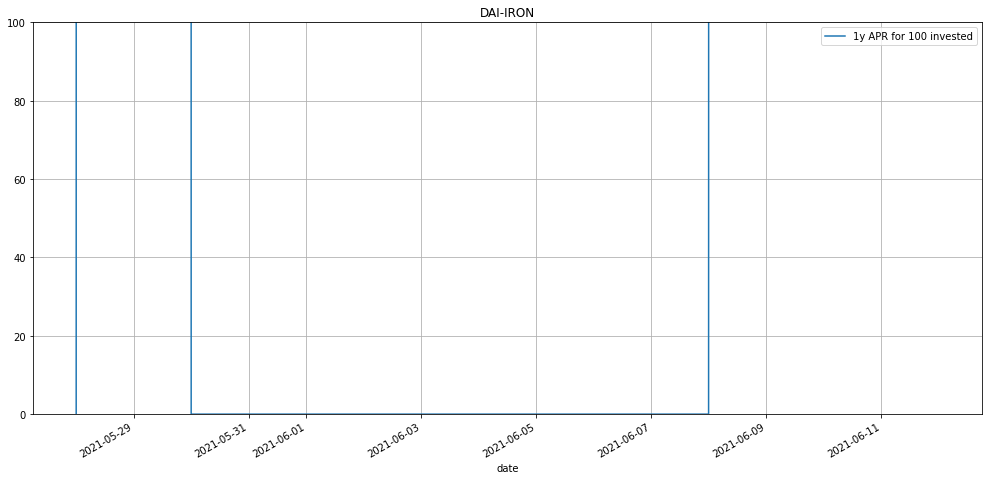

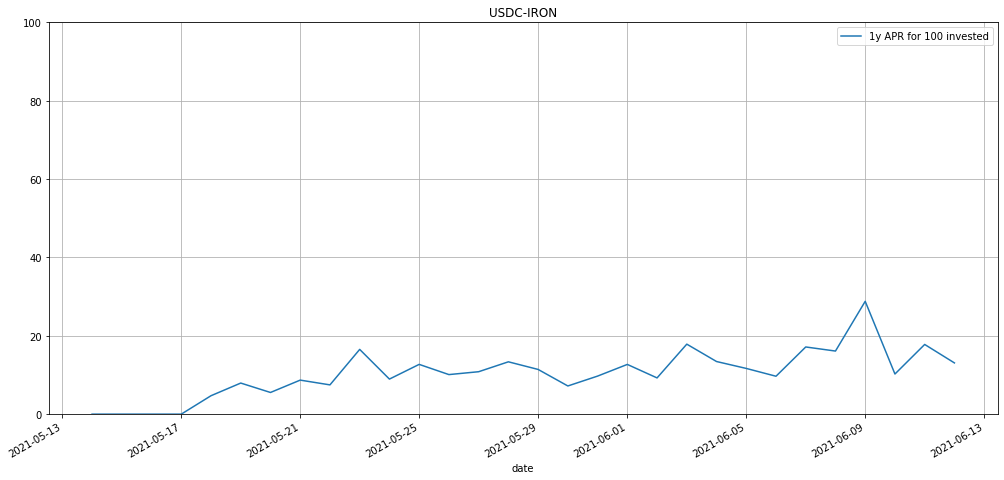

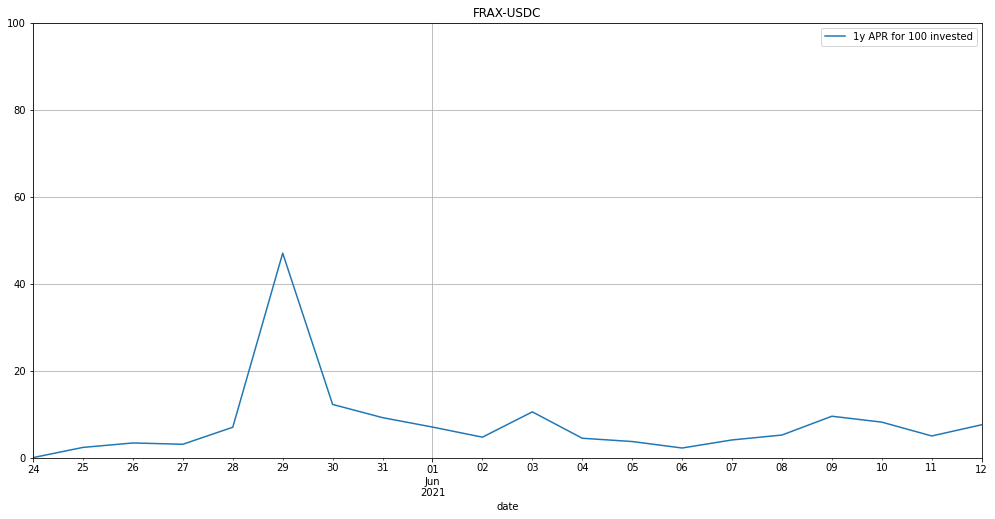

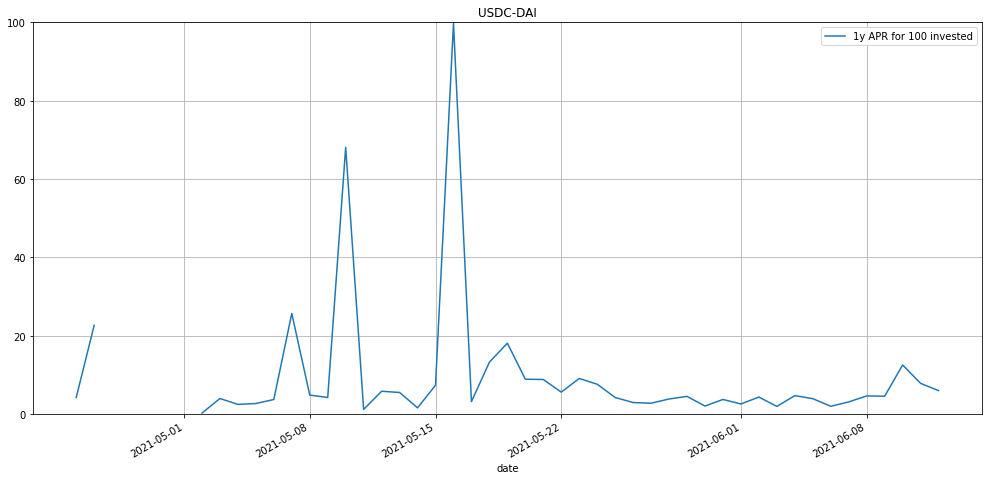

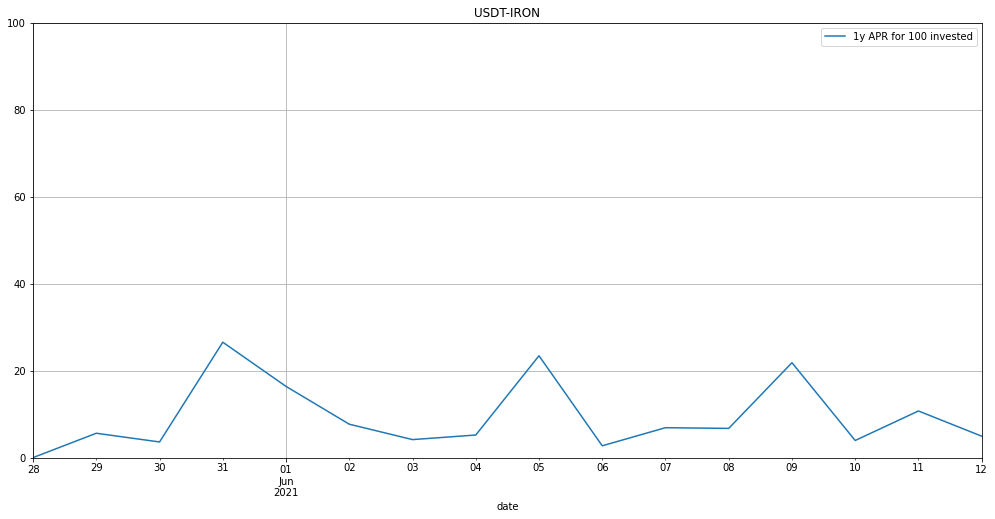

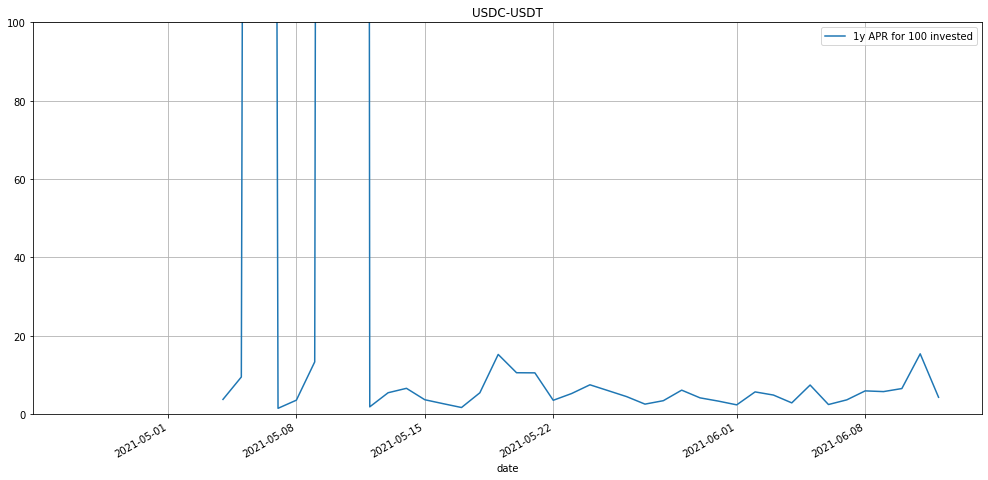

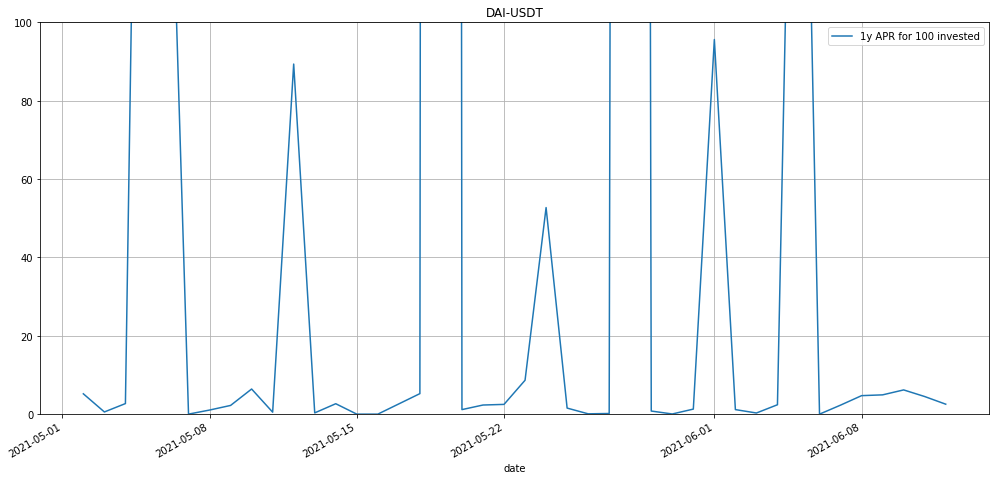

In [279]:
for pair in latest_results['name'].unique():
    criteria = df4['name'] == pair
    df4.loc[criteria, ['date', '1y APR for 100 invested']].plot(x ='date',
                                                                y='1y APR for 100 invested',
                                                                kind = 'line',
                                                                title = pair,
                                                                figsize = (17,8),
                                                                ylim = (0,100),
                                                                grid = True)